# AI Exam - Question 3: Customer Segmentation Pipeline

This notebook implements a complete clustering pipeline for customer segmentation.

## 1. Load Dataset
Load the Nigerian E-Commerce Dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Mock display function if not in Jupyter (for script testing)
try:
    display
except NameError:
    def display(obj):
        print(obj)

# Load dataset
file_path = 'Nigerian E-Commerce Dataset.xlsx'
df = pd.read_excel(file_path)

print("First 10 rows:")
display(df.head(10))

print("\nDataset Info:")
df.info()


First 10 rows:


,Order ID,Branch Location,Branch Name,Business Name,Is Deleted,Item ID,Item Name,Item Price,Order Item Number,Item Status,Packed Quantity,Quantity,Total Price,Order Date,Order Region,Order Local Area
0,4672,Lagos,Generic Store,Generic Stores,False,60a7b0242498ec1dd380508c,Golden Penny Spaghetti - 500g,4950.00,MLPLOCN1FAHUIYK50S0W9YUQ,Cancelled,1,1,4950.00,2021-05-31,Lagos,Ifako-Ijaye
1,4672,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML1DN3SZT8R02DKKNKBLXDXA,Cancelled,2,2,6785.50,2021-05-31,Lagos,Ifako-Ijaye
2,4671,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML2UMJU6I2P0O958PKZ9AMDQ,Cancelled,1,1,3392.75,2021-05-31,Lagos,Ifako-Ijaye
3,4670,Lagos,TDILIFE,TDILIFE,False,608045d069c51b4e80e70343,HOLLANDIA EVAP MILK FULL CREAM 60g X 48,3370.00,MLDFDZKVPFV0SHDGGA2KFNRG,Delivered,1,1,3370.00,2021-05-31,Lagos,Ifako-Ijaye
4,4670,Lagos,TDILIFE,TDILIFE,False,608042a469c51b4e80e702f7,HOLLANDIA EVAP MILK FULL CREAM 190g X 24,4845.00,MLFLBFFM0O5UAS0MROFAL0QA,Cancelled,1,1,4845.00,2021-05-31,Lagos,Ifako-Ijaye
5,4670,Lagos,TDILIFE,TDILIFE,False,608043c969c51b4e80e70314,HOLLANDIA EVAP MILK FULL CREAM 120g X 24,2760.00,ML39SRTWZAW0QRQZCVEUBCGW,Delivered,1,1,2760.00,2021-05-31,Lagos,Ifako-Ijaye
6,4669,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML2O0EB2MZNKSXAPFEKGG0JW,Cancelled,2,2,6785.50,2021-05-31,Lagos,Ifako-Ijaye
7,4669,Lagos,Generic Store,Generic Stores,False,60a7b0242498ec1dd380508c,Golden Penny Spaghetti - 500g,4950.00,MLJG03AA1NG0Y1EZBKFH88SG,Cancelled,1,1,4950.00,2021-05-31,Lagos,Alimosho
8,4668,Lagos,TDILIFE,TDILIFE,False,60b0cef62498ec1dd3805329,CHIVITA HAPPY HOUR - 150MLX24,1076.25,ML03X81AHZV026P0L0BCTSLW,Cancelled,1,1,1076.25,2021-05-31,Lagos,Alimosho
9,4668,Lagos,TDILIFE,TDILIFE,False,60b4d9352498ec1dd38053b6,CHIVITA ACTIVE 1LX10,4253.75,MLL1NIQOQDTEMWTIE07D20JW,Cancelled,1,1,4253.75,2021-05-31,Lagos,Alimosho



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3928 entries, 0 to 3927
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           3928 non-null   int64         
 1   Branch Location    3928 non-null   object        
 2   Branch Name        3928 non-null   object        
 3   Business Name      3928 non-null   object        
 4   Is Deleted         3928 non-null   bool          
 5   Item ID            3928 non-null   object        
 6   Item Name          3928 non-null   object        
 7   Item Price         3928 non-null   float64       
 8   Order Item Number  3928 non-null   object        
 9   Item Status        3928 non-null   object        
 10  Packed Quantity    3928 non-null   int64         
 11  Quantity           3928 non-null   int64         
 12  Total Price        3928 non-null   float64       
 13  Order Date         3928 non-null   datetime64[ns

## 2. Data Cleaning
Remove duplicates and handle missing values.

In [3]:
print(f"Original shape: {df.shape}")

# Remove duplicates
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

# Handle missing values
print("\nMissing values before handling:")
print(df.isnull().sum())

# Drop rows with missing essential values if any
df = df.dropna()
print(f"Final shape after handling missing values: {df.shape}")


Original shape: (2899, 16)
Shape after removing duplicates: (2899, 16)

Missing values before handling:
Order ID             0
Branch Location      0
Branch Name          0
Business Name        0
Is Deleted           0
Item ID              0
Item Name            0
Item Price           0
Order Item Number    0
Item Status          0
Packed Quantity      0
Quantity             0
Total Price          0
Order Date           0
Order Region         0
Order Local Area     0
dtype: int64
Final shape after handling missing values: (2899, 16)


## 3. Feature Engineering (RFM)
Create Recency, Frequency, and Monetary (RFM) features.

In [5]:
# Simulate Customer IDs for demonstration if not present
np.random.seed(42)
if 'CustomerID' not in df.columns:
    df['CustomerID'] = np.random.randint(1000, 1500, df.shape[0]) 

if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)

    # Calculate RFM
    rfm = df.groupby('CustomerID').agg({
        'Order Date': lambda x: (snapshot_date - x.max()).days, # Recency
        'Order ID': 'count', # Frequency
        'Total Price': 'sum' # Monetary
    }).rename(columns={
        'Order Date': 'Recency',
        'Order ID': 'Frequency',
        'Total Price': 'Monetary'
    })
else:
    print("Error: 'Order Date' column not found.")
    rfm = pd.DataFrame()

print("\nRFM Head:")
display(rfm.head())



RFM Head:


,Recency,Frequency,Monetary
CustomerID,,,
1000,8,11,1.651450e+06
1001,3,6,7.474290e+05
1002,20,4,3.652400e+04
1003,7,8,1.698124e+06
1004,5,9,6.412576e+05


## 4. Scale Numerical Features
Standardize the RFM features.

In [6]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm.index, columns=rfm.columns)

print("Scaled Data Sample:")
display(rfm_scaled_df.head())


Scaled Data Sample:


,Recency,Frequency,Monetary
CustomerID,,,
1000,-0.102112,2.065986,-0.133478
1001,-0.693410,0.071296,-0.297496
1002,1.317004,-0.726580,-0.426476
1003,-0.220371,0.869172,-0.125010
1004,-0.456891,1.268110,-0.316758


## 5. Run K-Means (Elbow Method)
Calculate inertia for k=2 to 10 to find the optimal number of clusters.

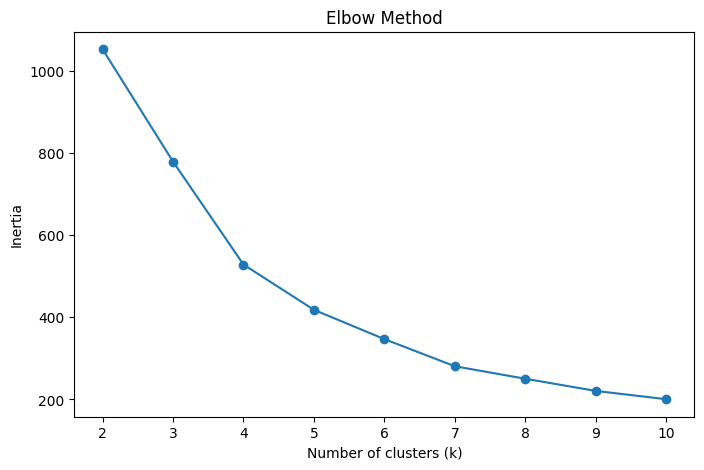

In [7]:
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


## 6. Apply K-Means with Optimal K
Fit the model with the selected k (k=3).

In [8]:
optimal_k = 3
print(f"Selected Optimal k: {optimal_k}")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm['Cluster'] = kmeans_final.fit_predict(rfm_scaled_df)

print("Cluster assignments added to dataframe.")


Selected Optimal k: 3
Cluster assignments added to dataframe.


## 7. PCA Visualization
Reduce dimensions to 2D for visualization.

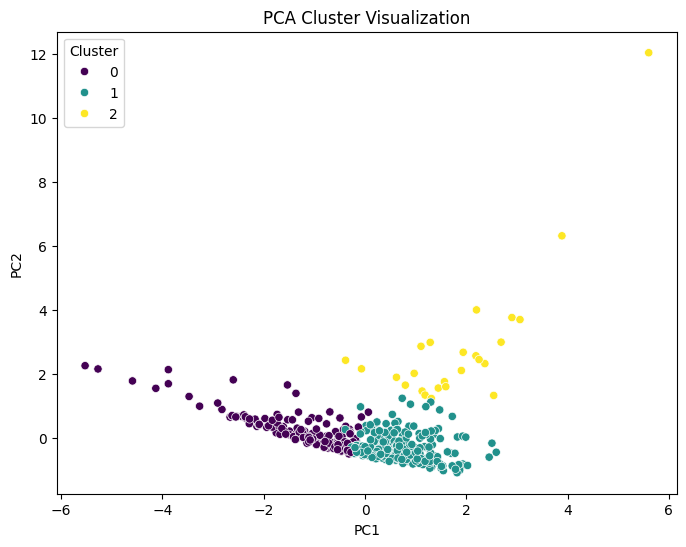

In [9]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled_df)

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = rfm['Cluster'].values

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA Cluster Visualization')
plt.show()


## 8. Run DBSCAN
Apply density-based clustering.

In [10]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled_df)

n_clusters_db = len(set(rfm['DBSCAN_Cluster'])) - (1 if -1 in rfm['DBSCAN_Cluster'] else 0)
n_noise_db = list(rfm['DBSCAN_Cluster']).count(-1)

print(f"DBSCAN found {n_clusters_db} clusters and {n_noise_db} noise points.")


DBSCAN found 2 clusters and 55 noise points.


## 9. Compute Silhouette Score
Evaluate the quality of K-Means clusters.

In [11]:
sil_score = silhouette_score(rfm_scaled_df, rfm['Cluster'])
print(f"Silhouette Score for k={optimal_k}: {sil_score:.4f}")


Silhouette Score for k=3: 0.3808


## 10. Cluster Profiling & Recommendations
Analyze mean values and provide marketing strategies.

In [12]:
cluster_profile = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
cluster_profile['Count'] = rfm['Cluster'].value_counts()

print("Cluster Profile (Mean Values):")
display(cluster_profile)

print("\nMarketing Recommendations:")
recommendations = {
    0: "Low Value / At Risk: Send 'We miss you' emails with small discounts.",
    1: "Core / Loyal Customers: Add to Loyalty Program and offer bundles.",
    2: "VIP / Whales: Assign personal account manager and give exclusive access."
}

for cluster_id in cluster_profile.index:
    print(f"Cluster {cluster_id}: {recommendations.get(cluster_id, 'Analyze further')}")


Cluster Profile (Mean Values):


,Recency,Frequency,Monetary,Count
Cluster,,,,
0,14.620321,3.422460,7.861786e+05,187
1,5.423077,7.304196,1.814245e+06,286
2,5.160000,6.800000,2.091634e+07,25



Marketing Recommendations:
Cluster 0: Low Value / At Risk: Send 'We miss you' emails with small discounts.
Cluster 1: Core / Loyal Customers: Add to Loyalty Program and offer bundles.
Cluster 2: VIP / Whales: Assign personal account manager and give exclusive access.


## 11. Save Results
Export the final dataset with cluster assignments.

In [13]:
rfm.to_csv('cluster_assignments.csv')
print("Cluster assignments saved to 'cluster_assignments.csv'.")
display(rfm.head(10))


Cluster assignments saved to 'cluster_assignments.csv'.


,Recency,Frequency,Monetary,Cluster,DBSCAN_Cluster
CustomerID,,,,,
1000,8,11,1.651450e+06,1,0
1001,3,6,7.474290e+05,1,0
1002,20,4,3.652400e+04,0,0
1003,7,8,1.698124e+06,1,0
1004,5,9,6.412576e+05,1,0
1005,7,4,1.129000e+05,0,0
1006,12,7,2.546884e+05,1,0
1007,14,7,1.060156e+06,1,0
1008,4,8,2.007986e+07,2,-1
